# Recolectando Datos

In [1]:
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from environment import GripperEnv

In [2]:
env = GripperEnv()

In [3]:
# Define a defaultdict to save the action and next observation using the current observation as a key. This key is a list.
action_dict = defaultdict(float)

In [1]:
obs = env.reset()
times = []
for _ in range(10000):
    action = env.action_space.sample()
    start_time = time.time()
    new_obs, reward, done, info = env.step(action)
    end_time = time.time()
    duration = end_time - start_time
    times.append(duration)
    # Save the observation and the action.
    action_dict[obs] = (action, new_obs)
    # Update the observation.
    obs = new_obs
env.close()

NameError: name 'env' is not defined

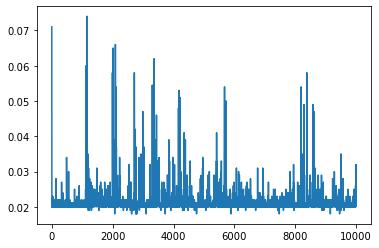

In [6]:
# Plot duration of each step.
plt.plot(times)

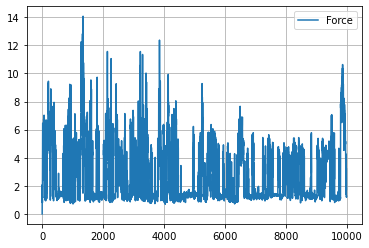

In [7]:
plt.plot(action_dict.keys(), label=f'Force')
plt.legend()
plt.grid()
plt.show()

In [8]:
import tensorflow as tf

In [9]:
# Define the model. The input is the observation and the action concatenated. The output is the next observation.
inputs = tf.keras.Input(shape=(2,), name='inputs')
x = tf.keras.layers.Dense(64)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation("relu")(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 385
Non-trainable params: 128
_____________________________________________________________

In [11]:
# Prepare the data from action_dict.
observations = np.array(list(action_dict.keys()),dtype=np.float32)
actions = np.array([action[0][0] for action in action_dict.values()],dtype=np.float32)
next_observations = [next_obs[1] for next_obs in action_dict.values()]

# Compose the input data, an array of shape (n_samples, 2, 1) where the first dimension is the observation and the second dimension is the action.
input_data = np.stack([observations, actions],axis=1)

# The output is the next observation.
output_data = np.array(next_observations,dtype=np.float32)

In [12]:
import sklearn.model_selection as ms

In [13]:
# Build the training and validation sets with a 0.5 ratio.
train_input, val_input, train_output, val_output = ms.train_test_split(input_data, output_data, test_size=0.5)


In [14]:
# Train the model.
model.fit(train_input, train_output, epochs=100, validation_data=(val_input, val_output))

Epoch 1/100
157/157 [==============================] - 3s 8ms/step - loss: 4.8500 - val_loss: 0.9745
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 1.1946 - val_loss: 1.1396
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 1.0621 - val_loss: 1.0542
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.9704 - val_loss: 0.8762
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.8953 - val_loss: 0.8646
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 0.8014 - val_loss: 0.7202
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 0.8262 - val_loss: 0.9233
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 0.7294 - val_loss: 0.8486
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.7136 - val_loss: 0.7799
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 0.7479 - val_lo

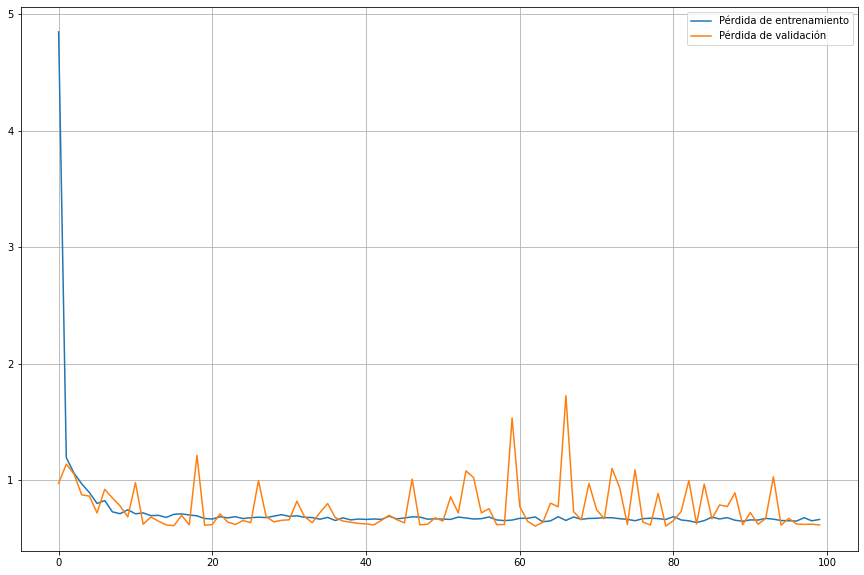

In [21]:
plt.figure(figsize=(15,10))
plt.plot(model.history.history["loss"], label = "Pérdida de entrenamiento")
plt.plot(model.history.history["val_loss"], label = "Pérdida de validación")
plt.grid()
plt.legend()

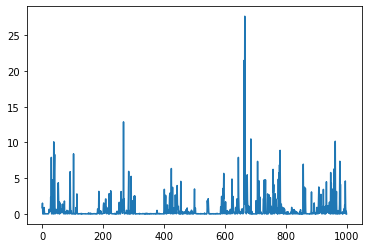

In [ ]:
# Plot duration of each step.
plt.plot([a[0] for a in errors])

In [ ]:
# Fuerza vs Tiempo

# Comparación de fuerza con entrenamiento y sin entrenamiento